In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
np.random.seed(42)

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv")

data.drop("RowNumber", axis=1, inplace=True)
data.drop("CustomerId", axis=1, inplace=True)
data.drop("Surname", axis=1, inplace=True)
X = data.iloc[:, :-1].values
y = data.iloc[:,-1].values

In [ ]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

In [ ]:
X_train

array([[1.0, 0.0, 0.0, ..., 1, 1, 179093.26],
       [0.0, 1.0, 0.0, ..., 1, 1, 195978.86],
       [0.0, 0.0, 1.0, ..., 1, 0, 85891.02],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 0, 92220.12],
       [1.0, 0.0, 0.0, ..., 1, 0, 97508.04],
       [0.0, 1.0, 0.0, ..., 1, 1, 53581.14]], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
X_train.shape

(8000, 12)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann = tf.keras.models.Sequential()

ann.add(Dense(units=6, activation='relu'))
ann.add(Dense(units=6, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.5350 - accuracy: 0.7632
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4573 - accuracy: 0.7940
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4429 - accuracy: 0.7987
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4327 - accuracy: 0.8043
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4231 - accuracy: 0.8069
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4123 - accuracy: 0.8116
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4012 - accuracy: 0.8161
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3924 - accuracy: 0.8169
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3853 - accuracy: 0.8179
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3791 - accura

In [ ]:
preds = ann.predict(X_test)

63/63 [==============================] - 0s 1ms/step


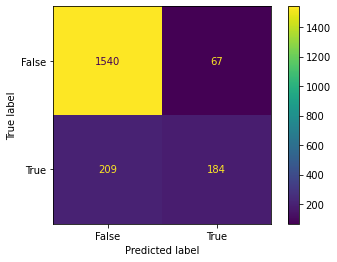

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import sklearn

preds = (preds > 0.5)
cm = confusion_matrix(y_test, preds)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()

In [ ]:
accuracy_score(y_test, preds)

0.862